# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [2]:

# Defining the pathway to the switch scanner metrics.
path_switchscan_metrics = '../SourceData/switch_scanner_metrics_retrain.xlsx'

# Importing the excel sheets for 4 vote and 7 vote thresholds.
df_2thr_1000ms = pd.read_excel(path_switchscan_metrics, '2_votes')
df_3thr_1000ms = pd.read_excel(path_switchscan_metrics, '3_votes')
df_4thr_1000ms = pd.read_excel(path_switchscan_metrics, '4_votes')
df_5thr_1000ms = pd.read_excel(path_switchscan_metrics, '5_votes')
df_6thr_1000ms = pd.read_excel(path_switchscan_metrics, '6_votes')
df_7thr_1000ms = pd.read_excel(path_switchscan_metrics, '7_votes')

# Extracting only the summary rows for each day.
df_2thr_summary = df_2thr_1000ms.loc[df_2thr_1000ms['Date'].str.contains('Total'),:]
df_3thr_summary = df_3thr_1000ms.loc[df_3thr_1000ms['Date'].str.contains('Total'),:]
df_4thr_summary = df_4thr_1000ms.loc[df_4thr_1000ms['Date'].str.contains('Total'),:]
df_5thr_summary = df_5thr_1000ms.loc[df_5thr_1000ms['Date'].str.contains('Total'),:]
df_6thr_summary = df_6thr_1000ms.loc[df_6thr_1000ms['Date'].str.contains('Total'),:]
df_7thr_summary = df_7thr_1000ms.loc[df_7thr_1000ms['Date'].str.contains('Total'),:]

# Remove the "_Total" suffix from each date.
df_2thr_summary['Date'] = df_2thr_summary['Date'].str.replace('_Total', '')
df_3thr_summary['Date'] = df_3thr_summary['Date'].str.replace('_Total', '')
df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
df_5thr_summary['Date'] = df_5thr_summary['Date'].str.replace('_Total', '')
df_6thr_summary['Date'] = df_6thr_summary['Date'].str.replace('_Total', '')
df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


/tmp/ipykernel_2994233/3597559115.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2thr_summary['Date'] = df_2thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_2994233/3597559115.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3thr_summary['Date'] = df_3thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_2994233/3597559115.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Overall Sensitivity (6-vote threshold):  94.11764705882352
Median Sensitivity (6-vote threshold):  95.03284072249589
Overall TPF (6-vote threshold):  11.339584890195983
Overall FPF (6-vote threshold):  0.20249258732492828
Median TPF (6-vote threshold):  11.506541149354938
Median FPF (6-vote threshold):  0.048950261639148465
Median NAVI Latency (6-vote threshold):  0.8674999999999999
CCPM and WCPM:
Median CCPM (6-vote threshold):  10.07750176588978
Median WCPM (6-vote threshold):  0.10053374623908151
CWPM:
Median CWPM (6-vote threshold):  2.163410246322065





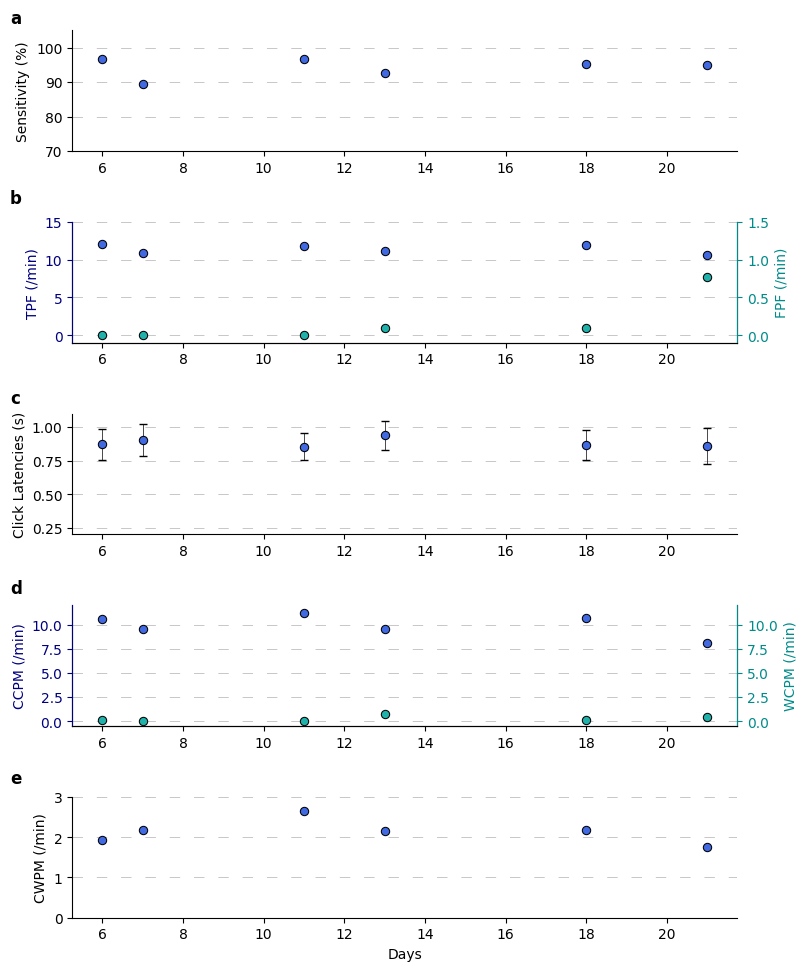

In [7]:


color1a = 'navy' # blue
color1b = 'royalblue' #cornflowerblue
color2a = 'darkcyan' # green
color2b = 'lightseagreen' # lightgreen

marker1 = 'o'
marker2 = '^'

save_figs = False



days_post_training_6thr  = np.asarray(df_6thr_summary['Days Post-Training']).astype(float)
tpf_6thr                 = np.asarray(df_6thr_summary['TPF ( /min)']).astype(float)
fpf_6thr                 = np.asarray(df_6thr_summary['FPF ( /min)']).astype(float)
acc_mean_6thr            = np.asarray(df_6thr_summary['Accuracy (%)']).astype(float)
mean_latency_BCI2K_6thr  = np.asarray(df_6thr_summary['Mean Latency to BCI2000 (s)'].values[6:]).astype(float)
mean_latency_NAVI_6thr   = np.asarray(df_6thr_summary['Mean Latency to NAVI (s)'].values).astype(float)
stdev_latency_BCI2K_6thr = np.asarray(df_6thr_summary['Stdev Latency to BCI2000 (s)'].values[6:]).astype(float)
stdev_latency_NAVI_6thr  = np.asarray(df_6thr_summary['Stdev Latency to NAVI (s)'].values).astype(float)
ccpm_6thr                = np.asarray(df_6thr_summary['Correct CPM']).astype(float)
wcpm_6thr                = np.asarray(df_6thr_summary['Wrong CPM']).astype(float)
cwpm_6thr                = np.asarray(df_6thr_summary['Correct WPM']).astype(float)

total_time_6thr = sum(np.asarray(df_6thr_summary['Block Time (s)']).astype(float))/60


n_grasps_total_6thr = sum(np.asarray(df_6thr_summary['N Grasps']).astype(float))
tp_total_6thr       = sum(np.asarray(df_6thr_summary['N Detections']).astype(float))
fp_total_6thr       = sum(np.asarray(df_6thr_summary['FPs']).astype(float))


acc_total_6thr = tp_total_6thr/n_grasps_total_6thr*100
tpf_total_6thr = tp_total_6thr/total_time_6thr
fpf_total_6thr = fp_total_6thr/total_time_6thr




fig, ax = plt.subplots(5,1, figsize=(8,10))
fig.tight_layout(pad=3)

# ROW 1: SENSITIVITY
ax[0].scatter(days_post_training_6thr, acc_mean_6thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
# ax[0].scatter(days_post_training_4thr, tpr_mean_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[0].set_yticks(np.arange(70,101,10)) 
ax[0].set_ylim([70, 105])
ax[0].set_ylabel('Sensitivity (%)')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].yaxis.label.set_color('k') 
ax[0].tick_params(axis='y', colors='k')
ax[0].spines['left'].set_color('k') 
ax[0].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
print('Overall Sensitivity (6-vote threshold): ', acc_total_6thr)
print('Median Sensitivity (6-vote threshold): ', statistics.median(acc_mean_6thr))

# ROW 2: TPR and FPR
ax[1].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[1].scatter(days_post_training_6thr, tpf_6thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[1].set_ylabel('TPF (/min)')
ax[1].set_yticks(np.arange(0,16,5)) 
ax[1].set_ylim([-1, 15])
ax[1].yaxis.label.set_color(color1a) 
ax[1].tick_params(axis='y', colors=color1a)
ax[1].spines[['top']].set_visible(False)

ax1a = ax[1].twinx()  
# ax1a.axhline(0, color=color2a, linewidth = 0.5, linestyle = '--', dashes=(10, 5))
ax1a.scatter(days_post_training_6thr, fpf_6thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax1a.set_ylabel('FPF (/min)')
ax1a.set_yticks(np.array([0,0.5,1,1.5])) 
ax1a.set_ylim([-0.1, 1.5])
ax1a.spines['right'].set_color(color2a) 
ax1a.spines['left'].set_color(color1a) 
ax1a.yaxis.label.set_color(color2a) 
ax1a.tick_params(axis='y', colors=color2a)
ax1a.spines[['top']].set_visible(False)
print('Overall TPF (6-vote threshold): ', tpf_total_6thr)
print('Overall FPF (6-vote threshold): ', fpf_total_6thr)
print('Median TPF (6-vote threshold): ', statistics.median(tpf_6thr))
print('Median FPF (6-vote threshold): ', statistics.median(fpf_6thr))


# ROW 3: BCI2000 AND NAVI LATENCIES
ax[2].errorbar(days_post_training_6thr, mean_latency_NAVI_6thr, yerr=stdev_latency_NAVI_6thr, linestyle="None", color='black', zorder=2, linewidth=0.5, capsize = 3)
ax[2].scatter(days_post_training_6thr, mean_latency_NAVI_6thr, color = color1b, edgecolors='black', marker=marker1, linewidths=0.75, zorder=3)
ax[2].set_ylabel('Click Latencies (s)')
ax[2].set_yticks(np.array([0.25, 0.5, 0.75, 1])) 
ax[2].set_ylim([0.20, 1.1])
ax[2].tick_params(axis='y', colors='k')
ax[2].spines[['top']].set_visible(False)
ax[2].spines[['top', 'right']].set_visible(False)
ax[2].yaxis.label.set_color('k') 
ax[2].grid(axis='y', linestyle='dashed', zorder=1, dashes=(15, 20), linewidth=0.5)
print('Median NAVI Latency (6-vote threshold): ', statistics.median(mean_latency_NAVI_6thr))

# ROW 4: CCPM and CWPM
ax[3].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[3].scatter(days_post_training_6thr, ccpm_6thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[3].set_ylabel('CCPM (/min)')
ax[3].set_yticks(np.arange(0,15,2.5)) 
ax[3].set_ylim([-0.5, 12])
ax[3].yaxis.label.set_color(color1a) 
ax[3].tick_params(axis='y', colors=color1a)
ax[3].spines[['top']].set_visible(False)
ax3a = ax[3].twinx()  
ax3a.scatter(days_post_training_6thr, wcpm_6thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax3a.set_ylabel('WCPM (/min)')
ax3a.set_yticks(np.arange(0,15,2.5))
ax3a.set_ylim([-0.5, 12])
ax3a.spines['right'].set_color(color2a) 
ax3a.spines['left'].set_color(color1a) 
ax3a.yaxis.label.set_color(color2a) 
ax3a.tick_params(axis='y', colors=color2a)
ax3a.spines[['top']].set_visible(False)
print('CCPM and WCPM:')
print('Median CCPM (6-vote threshold): ', statistics.median(ccpm_6thr))
print('Median WCPM (6-vote threshold): ', statistics.median(wcpm_6thr))





# ROW 5: CWPM (Correct words per min)
ax[4].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[4].scatter(days_post_training_6thr, cwpm_6thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[4].set_ylabel('CWPM (/min)')
ax[4].set_yticks(np.arange(0,3.1,1)) 
ax[4].set_ylim([0, 3])
ax[4].tick_params(axis='y', colors='k')
ax[4].spines[['top', 'right']].set_visible(False)
ax[4].set_xlabel('Days')
print('CWPM:')
print('Median CWPM (6-vote threshold): ', statistics.median(cwpm_6thr))
print('\n\n')





# Subfigure labels.
fig.text(0.025, 0.96, 
         'a', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.025, 0.78, 
         'b', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.025, 0.58, 
         'c', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.025, 0.39, 
         'd', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.025, 0.20, 
         'e', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')


if save_figs: 
    fig.savefig('SummaryMetricsFigure_Retrain.jpg', bbox_inches = 'tight', dpi=1000)
    fig.savefig('SummaryMetricsFigure_Retrain.svg', format = 'svg', bbox_inches = 'tight', dpi=1000)




In [4]:
tpr_7_thr_old = np.array([94.35215947, 97.84946237, 96.62337662, 97.05882353, 84.29906542,95.02487562, 91.37254902, 94.96855346, 86.9047619 ])
tpf_7_thr_old = np.array([10.24840966, 11.43418381, 11.36594524, 10.54433112,  9.3184289 , 10.9011939 , 10.92966238, 10.67185575,  9.74211206])
fpf_7_thr_old = np.array([0.1443438 , 0.18847556, 0.06110723, 0.43934713, 0.0206617 , 0.02853716, 0.        , 0.02355818, 0.       ])
NAVI_latency_7_thr_old = np.array([0.883, 0.803, 0.899, 0.823, 0.959, 0.899, 0.967, 0.927, 0.976])
ccpm_7_thr_old = np.array([5.80983787,  7.47619711, 10.35767591,  9.38605233,  9.07048844, 9.21750165, 10.41366974,  8.55161951,  7.57349122])
wcpm_7_thr_old = np.array([0.50520329, 0.75390223, 0.12221446, 0.27958454, 0.14463193, 0.02853716, 0.04690842, 0.18846544, 0.60054115])
cwpm_7_thr_old = np.array([1.19083633, 1.57062964, 2.19986037, 1.99703241, 1.88021514, 1.85491519, 2.15778742, 1.74330535, 1.56807968])

tpr_4_thr_old = np.array([97.82608696, 97.90076336, 96.41109299, 97.6635514 , 97.96610169, 98.38129496, 94.106814  , 97.80405405, 90.31007752])
tpf_4_thr_old = np.array([12.2027096 , 11.59672775, 11.36939306, 11.82325088, 11.59355174, 11.77208638, 11.09079366, 11.64218479, 10.50080108])
fpf_4_thr_old = np.array([0.        , 0.40690273, 0.09618776, 0.05657058, 0.48139315, 0.21521182, 0.10852049, 0.100537  , 0.06760172])
NAVI_latency_4_thr_old = np.array([0.704, 0.644, 0.692, 0.702, 0.652, 0.631, 0.698, 0.667, 0.682])
ccpm_4_thr_old = np.array([11.47958607, 10.71510517, 10.1959024 , 11.2575451 ,  9.26681817, 9.79213767,  9.68002735,  8.96790055, 10.34306373])
wcpm_4_thr_old = np.array([0.        , 0.18084566, 0.09618776, 0.11314116, 0.32092877, 0.25825418, 0.15192868, 0.0804296 , 0.06760172])
cwpm_4_thr_old = np.array([2.6213228 , 2.2153593 , 2.13536824, 2.43253487, 1.9656887 , 2.06603344, 2.04018514, 1.86998823, 2.20832297])

In [5]:
import scipy

print(acc_mean_6thr.mean(), tpr_4_thr_old.mean())
print(scipy.stats.ranksums(acc_mean_6thr, tpr_4_thr_old))

print(tpf_6thr.mean(), tpf_4_thr_old.mean())
print(scipy.stats.ranksums(tpf_6thr, tpf_4_thr_old))

print(fpf_6thr.mean(), fpf_4_thr_old.mean())
print(scipy.stats.ranksums(fpf_6thr, fpf_4_thr_old))

print(mean_latency_NAVI_6thr.mean(), NAVI_latency_4_thr_old.mean())
print(scipy.stats.ranksums(mean_latency_NAVI_6thr, NAVI_latency_4_thr_old))

print(ccpm_6thr.mean(), ccpm_4_thr_old.mean())
print(scipy.stats.ranksums(ccpm_6thr, ccpm_4_thr_old))

print(wcpm_6thr.mean(), wcpm_4_thr_old.mean())
print(scipy.stats.ranksums(wcpm_6thr, wcpm_4_thr_old))

print(cwpm_6thr.mean(), cwpm_4_thr_old.mean())
print(scipy.stats.ranksums(cwpm_6thr, cwpm_4_thr_old))

94.30045809890684 96.48553743666668
RanksumsResult(statistic=-1.885618083164127, pvalue=0.05934643879191985)
11.427998742717664 11.51016654888889
RanksumsResult(statistic=0.11785113019775793, pvalue=0.9061856157549283)
0.16215598505000836 0.1703250277777778
RanksumsResult(statistic=-1.0017346066809425, pvalue=0.31647178784797814)
0.8811666666666667 0.6746666666666666
RanksumsResult(statistic=3.1819805153394642, pvalue=0.001462716586681149)
9.938292431534093 10.188676245555556
RanksumsResult(statistic=-0.47140452079103173, pvalue=0.6373518882339371)
0.251930991654798 0.14103528111111113
RanksumsResult(statistic=0.1767766952966369, pvalue=0.8596837951986661)
2.1392215475142655 2.172755965555556
RanksumsResult(statistic=-0.23570226039551587, pvalue=0.8136637157667919)


In [6]:
import scipy

print(acc_mean_6thr.mean(), tpr_7_thr_old.mean())
print(scipy.stats.ranksums(acc_mean_6thr, tpr_7_thr_old))

print(tpf_6thr.mean(), tpf_7_thr_old.mean())
print(scipy.stats.ranksums(tpf_6thr, tpf_7_thr_old))

print(fpf_6thr.mean(), fpf_7_thr_old.mean())
print(scipy.stats.ranksums(fpf_6thr, fpf_7_thr_old))

print(mean_latency_NAVI_6thr.mean(), NAVI_latency_7_thr_old.mean())
print(scipy.stats.ranksums(mean_latency_NAVI_6thr, NAVI_latency_7_thr_old))

print(ccpm_6thr.mean(), ccpm_7_thr_old.mean())
print(scipy.stats.ranksums(ccpm_6thr, ccpm_7_thr_old))

print(wcpm_6thr.mean(), wcpm_7_thr_old.mean())
print(scipy.stats.ranksums(wcpm_6thr, wcpm_7_thr_old))

print(cwpm_6thr.mean(), cwpm_7_thr_old.mean())
print(scipy.stats.ranksums(cwpm_6thr, cwpm_7_thr_old))

94.30045809890684 93.16151415666667
RanksumsResult(statistic=0.23570226039551587, pvalue=0.8136637157667919)
11.427998742717664 10.572902535555555
RanksumsResult(statistic=1.885618083164127, pvalue=0.05934643879191985)
0.16215598505000836 0.10067008444444443
RanksumsResult(statistic=-0.3535533905932738, pvalue=0.7236736098317631)
0.8811666666666667 0.9039999999999999
RanksumsResult(statistic=-0.9428090415820635, pvalue=0.3457785861511603)
9.938292431534093 8.650725975555554
RanksumsResult(statistic=2.003469213361885, pvalue=0.045126948888676105)
0.251930991654798 0.2966654022222222
RanksumsResult(statistic=-0.7071067811865476, pvalue=0.47950012218695337)
2.1392215475142655 1.7958512811111111
RanksumsResult(statistic=1.7677669529663689, pvalue=0.0770998717435417)
